## problem statement :-  linear regression

In [4]:
Some real estate company X has data containing the prices of property and other factors about the
property.

The company wants to identify important factors that are affecting the price of a property.

Create a linear model that can accurately predict house prices.

SyntaxError: invalid syntax (<ipython-input-4-fdc06e0f8b8b>, line 1)

In [1]:
## importing library:

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## step: 1--reading and understanding data:

In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
## to check no. of rows and columns:

df.shape


(545, 13)

In [8]:
## to check 1st five dataset using head method:

pd.set_option('max_rows',None)  # for showing all columns
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
## to check column summary:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
## to check numeric columns:

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
## to check the format of the column:

df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## step: 2-- Data quality check:

In [12]:
#to check missing values:

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### observation:

--there are no missing values in dataframe

In [13]:
## to check numeric values price column:

df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

## step: 3--to check outliers using boxplot:

In [7]:
df.columns #to get column name


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<AxesSubplot:xlabel='price'>

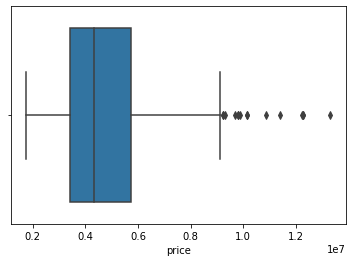

In [16]:
## 1st--to check outliers on price column:

sns.boxplot(df['price'])

q4 8400000.0


<AxesSubplot:xlabel='price'>

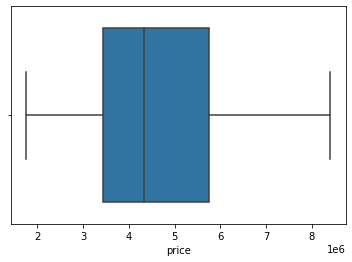

In [17]:
## capping to 95 percentile on price column:

q4 = df['price'].quantile(0.95)
print('q4',q4)

df.loc[df['price']>q4,'price']=q4

sns.boxplot(df['price'])

<AxesSubplot:xlabel='area'>

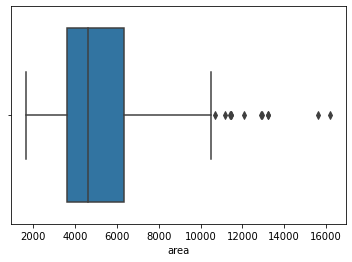

In [18]:
## 2nd - to check outliers on area column:

sns.boxplot(df['area'])

9000.0


<AxesSubplot:xlabel='area'>

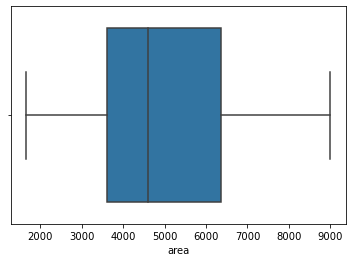

In [20]:
## capping to 95 percentile on area column:

q4 = df['area'].quantile(0.95)
print(q4)

df.loc[df['area']>q4,'area']=q4
sns.boxplot(df['area'])

<AxesSubplot:xlabel='bedrooms'>

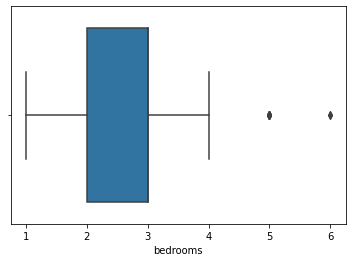

In [21]:
## 3rd --to check outliers on bedroom:

sns.boxplot(df['bedrooms'])

4.0


<AxesSubplot:xlabel='bedrooms'>

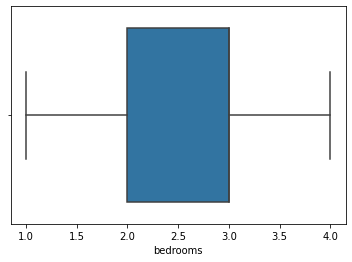

In [23]:
## capping to 95 percentile on bedrooms:

q4 = df['bedrooms'].quantile(0.95)
print(q4)

df.loc[df['bedrooms']>q4,'bedrooms']=q4
sns.boxplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms'>

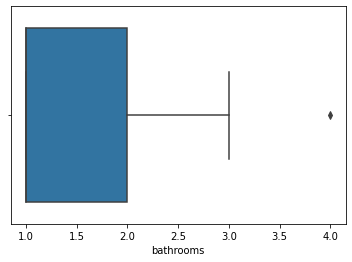

In [24]:
## 4th-- to check outliers on bathroom:

sns.boxplot(df['bathrooms'])

2.0


<AxesSubplot:xlabel='bathrooms'>

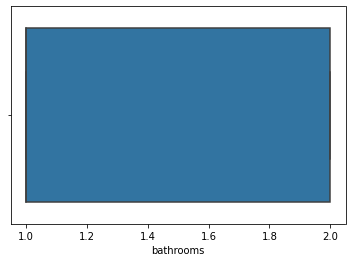

In [25]:
## capping to 95 percentile on bathrooms:

q4 = df['bathrooms'].quantile(0.95)
print(q4)
df.loc[df['bathrooms']>q4,'bathrooms']=q4
sns.boxplot(df['bathrooms'])

<AxesSubplot:xlabel='stories'>

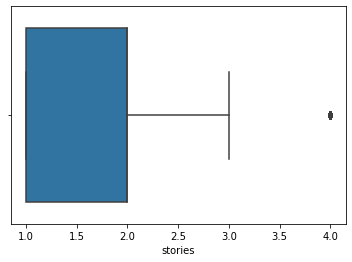

In [26]:
## 5th -- to check outliers on stories column:

sns.boxplot(df['stories'])

4.0


<AxesSubplot:xlabel='stories'>

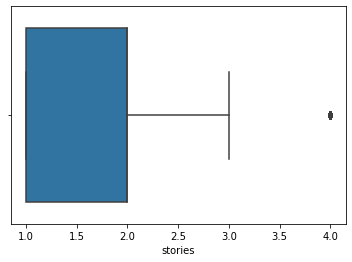

In [27]:
## capping to 95 percentile on stories:

q4=df['stories'].quantile(0.95)
print(q4)

df.loc[df['stories']>q4,'stories']=q4
sns.boxplot(df['stories'])

<AxesSubplot:xlabel='parking'>

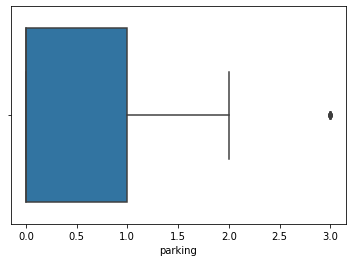

In [28]:
## 6th-- to check outliers on parking:

sns.boxplot(df['parking'])

2.0


<AxesSubplot:xlabel='parking'>

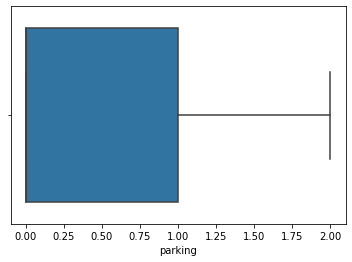

In [29]:
## capping to 95 percentile on parking:

q4 = df['parking'].quantile(0.95)
print(q4)

df.loc[df['parking']>q4,'parking']=q4
sns.boxplot(df['parking'])

## Bivariate analysis:

<AxesSubplot:xlabel='area', ylabel='price'>

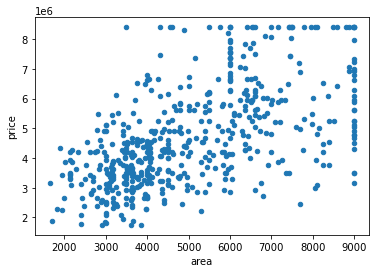

In [30]:
## to compare linear rlationship between two columns:

df.plot.scatter('area','price')

### observation:

--as area increases price increases

<AxesSubplot:xlabel='area', ylabel='stories'>

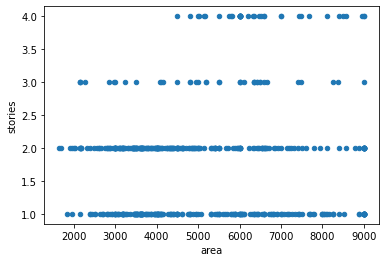

In [32]:
## to compare linear rlationship between two columns:

df.plot.scatter('area','stories')

### observation:

--as stories increases construction area decreases

## step: 4 -- plotting heatmap to check the multivariance:

<AxesSubplot:>

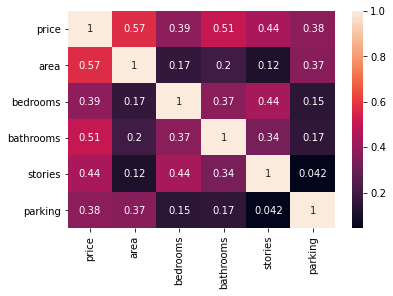

In [33]:
sns.heatmap(df.corr(),annot=True)   

#annot=True means to places numbers inside blocks

### observation:

--the correlation coefficient ranges from -1 to 1. 
if the value is close to 1 it means that there is positive correlation between two variables. 
when it is close to -1 the variable have a negative correlation.

In [35]:
## to convert all catogorical data into numerical:

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

cat_col = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[cat_col] = df[cat_col].apply(LabelEncoder().fit_transform)

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8400000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished
1,8400000.0,8960.0,4.0,2.0,4.0,1,0,0,0,1,2.0,0,furnished
2,8400000.0,9000.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished
3,8400000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.0,1,furnished
4,8400000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished


In [37]:
## creating dummy values of furnishing status:

x = df['furnishingstatus']
x = pd.get_dummies(x,drop_first=True)

In [38]:
x

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,1
8,0,0
9,0,1


In [39]:
df.drop('furnishingstatus',axis=1,inplace=True) 

# the data is modified and inplaced and updated

In [40]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [42]:
df = pd.concat([df,x],axis=1)  

# to concat two dataframe

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,8400000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0,0
1,8400000.0,8960.0,4.0,2.0,4.0,1,0,0,0,1,2.0,0,0,0
2,8400000.0,9000.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1,0
3,8400000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.0,1,0,0
4,8400000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0,0


## MinMaxScaller:

In [44]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

m_scaler.fit_transform(df[num_cols])

array([[1.        , 0.78503401, 1.        , 1.        , 0.66666667,
        1.        ],
       [1.        , 0.99455782, 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, 1.        , 0.33333333,
        1.        ],
       ...,
       [0.        , 0.26802721, 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.        , 0.17142857, 0.66666667, 0.        , 0.        ,
        0.        ],
       [0.        , 0.29931973, 0.66666667, 0.        , 0.33333333,
        0.        ]])

## step: 6--Train Test Split:

In [46]:
## select the target & trasform the model using train test split:

x = df.drop('price',axis=1)
y = df['price']

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42)

## step: 7--fit the model:

In [48]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

LinearRegression()

In [49]:
## predict the model:

y_pred = lr_model.predict(x_test)

In [50]:
## step: 8--evaluate the model:

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6692795019042375